In [1]:
# Imports:
import numpy as np
import matplotlib.pyplot as plt

import pycity_scheduling.util.factory as factory
from pycity_scheduling.algorithms import *
from pycity_scheduling.classes import *

In [2]:
# The environment:
env = factory.generate_standard_environment(initial_date=(2018, 3, 5), step_size=900, op_horizon=96)

In [3]:
# The city district specification:
num_sfh = 10

sfh_heating_distribution = {
    'BL': 1.0,
    'HP': 0.0,
}

sfh_device_probs = {
    'FL': 1.0,
    'EV': 0.0,
    'PV': 0.5,
}

district = factory.generate_tabula_district(environment=env,
                                            number_sfh=num_sfh,
                                            number_mfh=0,
                                            sfh_heating_distribution=sfh_heating_distribution,
                                            sfh_device_probabilities=sfh_device_probs,
                                            district_objective='peak-shaving',
                                            building_objective='none')

In [4]:
# Perform the scheduling:
opt = CentralOptimization(city_district=district)
res = opt.solve()

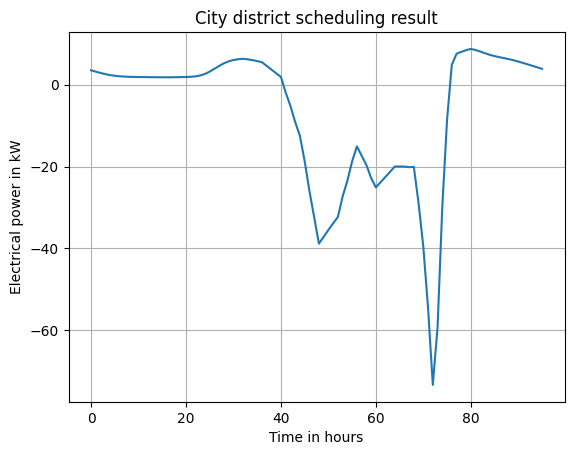

In [5]:
# Plot the city district's electrical power schedule:
plt.plot(district.p_el_schedule)
plt.xlabel('Time in hours')
plt.ylabel('Electrical power in kW')
plt.title('City district scheduling result')
plt.grid()
plt.show()